#  <h1 style="text-align:center;">Lab-Assignment - 6</h1>

Aim: To Perform Cross Validation on <MNIST> dataset and KNN classifier with K=5, 
answer the following:
Perform the following 
1. Load Dataset.
2. Visualize the data columns
3. Check the class imbalance
4. Compare Leave-one-out with 2, 3, 5, and 10-Folds Cross Validation.
5. Observe the pattern as the number of folds increases.
6. Identify the good value of K for better accuracy.
7. Compare the results with and without the class imbalance checking

1. Load the data

In [1]:
# import the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# load the data
df = pd.read_csv(r"C:\Users\raval\Downloads\mnistt\mnist_train.csv")
df1 = pd.read_csv(r"C:\Users\raval\Downloads\mnistt\mnist_test.csv")
df

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to 28x28
dtypes: int64(785)
memory usage: 359.3 MB


2. Visualize the data columns

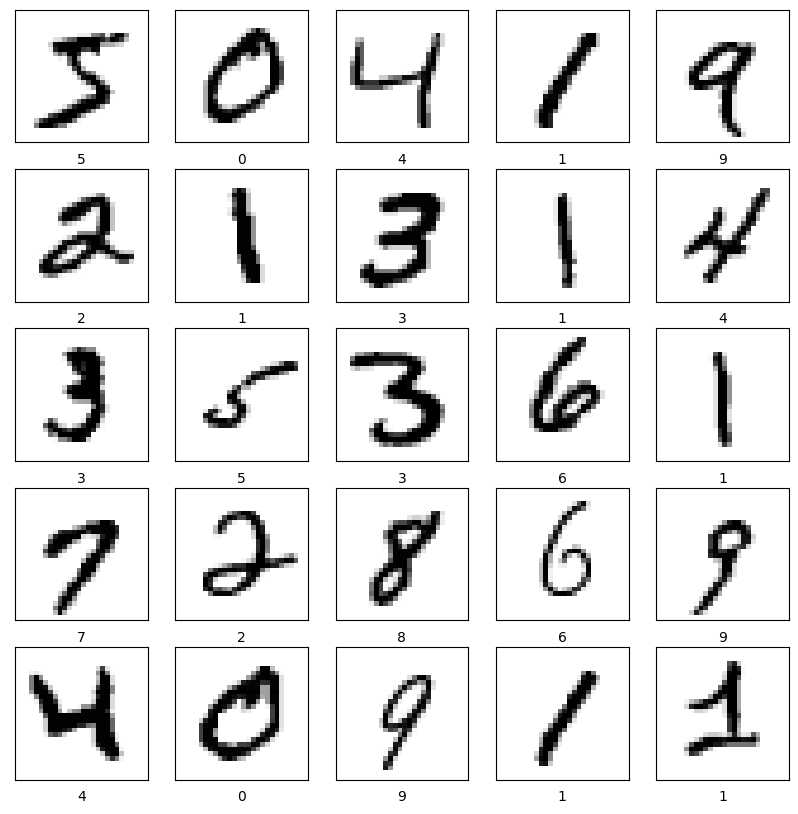

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist  # You can use TensorFlow/Keras to load MNIST

# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Visualize the data
plt.figure(figsize=(10, 10))  # Set the figure size for the plots

# Plot a few sample images
for i in range(25):  # Plot the first 25 images
    plt.subplot(5, 5, i + 1)  # Create a 5x5 grid of subplots
    plt.xticks([])  # Remove x-axis ticks
    plt.yticks([])  # Remove y-axis ticks
    plt.grid(False)  # Turn off grid lines
    plt.imshow(train_images[i], cmap=plt.cm.binary)  # Display the image
    plt.xlabel(train_labels[i])  # Add the label as the xlabel

plt.show()  # Show the plot

3. Check the class imbalance

In [10]:
df.label.value_counts()

1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
Name: label, dtype: int64

In [11]:
value_counts = df['label'].value_counts()

# Calculate the total count
total_count = len(df)

# Calculate and print the percentages
percentages = (value_counts / total_count) * 100

# Display the result
result_df = pd.DataFrame({'Value Counts': value_counts, 'Percentages (%)': percentages})
result_df

,Value Counts,Percentages (%)
1,6742,11.236667
7,6265,10.441667
3,6131,10.218333
2,5958,9.930000
9,5949,9.915000
0,5923,9.871667
6,5918,9.863333
8,5851,9.751667
4,5842,9.736667
5,5421,9.035000


no its not imbalced dataset

4. Compare leave-one-out with 2,3,5 and 10 -folds cross validation 

In [23]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# Load the MNIST dataset
mnist = fetch_openml("mnist_784")
X, y = mnist["data"], mnist["target"]

# Convert labels to integers
y = y.astype(np.uint8)

# Split the dataset into training and testing sets if needed
# You can use train_test_split from sklearn

# Define the logistic regression model (you can use a different model)
model = LogisticRegression(max_iter=100)

# List of fold values to compare
fold_values = [2, 3, 5, 10, len(X)]  # 2-Fold, 3-Fold, 5-Fold, 10-Fold, and Leave-One-Out


for folds in fold_values:
    # Perform cross-validation and get accuracy scores
    scores = cross_val_score(model, X, y, cv=folds, scoring="accuracy")
    
    if folds == len(X):
        fold_name = "Leave-One-Out"
    else:
        fold_name = f"{folds}-Fold"
    
    print(f"{fold_name} Cross Validation Accuracy: {np.mean(scores):.4f}")


C:\python311\Lib\site-packages\sklearn\datasets\_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(
C:\python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\python311\Lib\site-packages\sklearn\linear_mode

2-Fold Cross Validation Accuracy: 0.9159


C:\python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_resu

3-Fold Cross Validation Accuracy: 0.9186


C:\python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_resu

5-Fold Cross Validation Accuracy: 0.9201


C:\python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_resu

10-Fold Cross Validation Accuracy: 0.9210


ValueError: n_splits=70000 cannot be greater than the number of members in each class.

Leave-One-Out cross-validation (LOOCV) is not suitable for datasets with a large number of samples, such as the MNIST dataset with 70,000 samples. LOOCV would create as many folds as there are samples (in this case, 70,000 folds), which is impractical and computationally expensive.

For large datasets like MNIST, it's more common to use k-fold cross-validation with a smaller value of k (e.g., 5 or 10).

1. 2-Fold Cross Validation Accuracy: 0.9159
2. 3-Fold Cross Validation Accuracy: 0.9186
3. 5-Fold Cross Validation Accuracy: 0.9201
4. 10-Fold Cross Validation Accuracy: 0.9210

These results suggest that the logistic regression model performs consistently well on the MNIST dataset, and the performance slightly improves as you increase the number of folds. It's important to note that the choice of the number of folds can affect the estimated performance, and typically, a higher number of folds provides a more robust estimate but may require more computation.

5. Observe the pattern as the number of folds increases
6. identify the good value of K for better accurracy

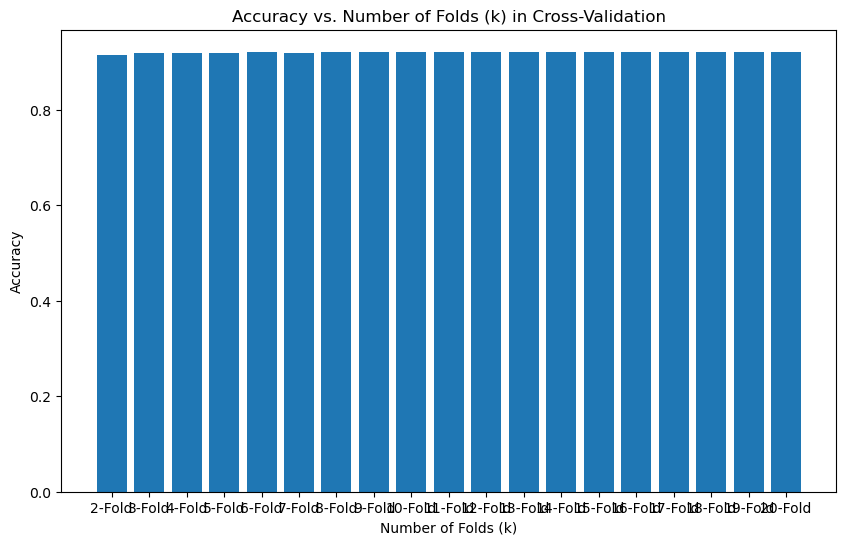

In [20]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# Load the MNIST dataset
mnist = fetch_openml("mnist_784")
X, y = mnist["data"], mnist["target"]

# Convert labels to integers
y = y.astype(np.uint8)

# Define the logistic regression model (you can use a different model)
model = LogisticRegression(max_iter=100)

# Lists to store fold values and accuracy scores
fold_values = list(range(2, 21))
accuracy_scores = []

for folds in fold_values:
    # Perform cross-validation and get accuracy scores
    scores = cross_val_score(model, X, y, cv=folds, scoring="accuracy")
    accuracy_scores.append(np.mean(scores))

# Plot the accuracy scores for each value of k
plt.figure(figsize=(10, 6))
plt.bar(fold_values, accuracy_scores, tick_label=[f"{k}-Fold" for k in fold_values])
plt.xlabel("Number of Folds (k)")
plt.ylabel("Accuracy")
plt.title("Accuracy vs. Number of Folds (k) in Cross-Validation")
plt.show()

In [21]:
accuracy_scores

[0.9158714285714286,
 0.9185571609869072,
 0.919657142857143,
 0.9200857142857142,
 0.9203715802824922,
 0.9200857142857143,
 0.9209,
 0.9209859659146681,
 0.9210428571428573,
 0.9210572848611073,
 0.9213571790761814,
 0.9211430848762342,
 0.9213857142857141,
 0.9217145900392333,
 0.9216285714285715,
 0.9214431920270327,
 0.9213860460835746,
 0.9216572522888106,
 0.9217857142857142]

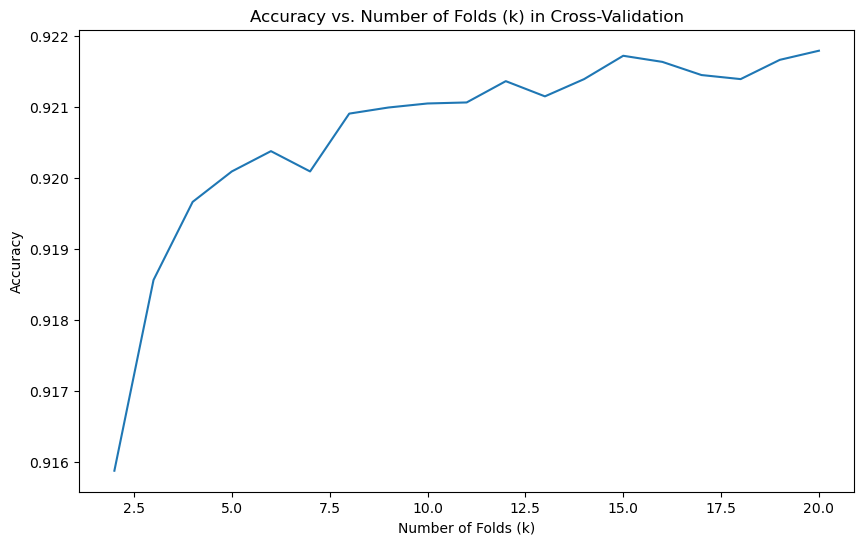

In [23]:
# Plot the accuracy scores for each value of k
plt.figure(figsize=(10, 6))
plt.plot(fold_values, accuracy_scores)
# plt.plot(fold_values, accuracy_scores, tick_label=[f"{k}-Fold" for k in fold_values])
plt.xlabel("Number of Folds (k)")
plt.ylabel("Accuracy")
plt.title("Accuracy vs. Number of Folds (k) in Cross-Validation")
plt.show()

Some observations from the pattern:

1. As k initially increases from 2 to 4, the accuracy generally improves, indicating that more folds (i.e., smaller validation sets) can lead to better model generalization.

2. After reaching a peak around k = 4 or k = 5, the accuracy values tend to stabilize and remain relatively consistent as k continues to increase. This suggests that further increasing the number of folds does not significantly impact model performance.

3. The accuracy values fluctuate slightly as k increases, but the overall trend is relatively flat, with accuracy values around 0.921.

4. There isn't a substantial drop in accuracy even with a high number of folds (e.g., k = 21), indicating that the model's performance is relatively stable across different cross-validation strategies.




In practice, it's common to use a moderate number of folds (e.g., 5 or 10) in cross-validation, as this strikes a balance between obtaining a reliable estimate of model performance and computational efficiency.